<a href="https://colab.research.google.com/github/dmorton714/louisville_metro/blob/main/lmg_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import seaborn as sns 

Reads in the sheet from GitHub


In [172]:
df = pd.read_csv('https://raw.githubusercontent.com/dmorton714/louisville_metro/main/SalaryData.csv', encoding='cp1252')






This drops the columns I dont need. 

In [173]:
df.drop(columns=['Employee_Name', 'Incentive_Allowance', 'Other'], inplace=True)
df.rename(columns={'CalYear':'Year'}, inplace=True)


This sorts the sheet by department 

In [174]:
df.sort_values(by='Department', inplace=True)

df.head()

,Year,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,YTD_Total
18010,2019,Air Pollution Control,APCD Engineer I,62753.6,62417.61,0.0,62417.61
10221,2016,Air Pollution Control,Community Outreach Coord,48110.4,47610.03,0.0,47610.03
10220,2017,Air Pollution Control,Community Outreach Coord,49067.2,48552.06,0.0,48552.06
34227,2020,Air Pollution Control,Executive Assistant,35734.4,37108.80,0.0,37108.80
34228,2022,Air Pollution Control,Executive Assistant,40560.0,22935.84,0.0,22935.84


In [175]:
df.drop(df[df['Year'] != 2021].index, inplace=True)
df.head()

,Year,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,YTD_Total
10153,2021,Air Pollution Control,Management Assistant U310,53705.6,53162.99,0.0,55117.99
17457,2021,Air Pollution Control,APCD Engineer III,77979.2,76819.48,0.0,78319.08
10403,2021,Air Pollution Control,APCD Field Technician U310,53185.6,52653.61,0.0,54810.06
34226,2021,Air Pollution Control,Executive Assistant,36816.0,36262.72,0.0,36262.72
10226,2021,Air Pollution Control,Community Outreach Coord,52582.4,51795.04,0.0,51795.04


This calculates the total annual rate of the LMPD 

In [176]:
# df.groupby('Department')['Annual_Rate'].sum()['Air Pollution Control']
df.groupby('Department')['YTD_Total'].sum()['Louisville Metro Police'].sum()

103384082.76

In [177]:
df.groupby('Department')['Annual_Rate'].sum()['Louisville Metro Police'].sum()

95599592.4

In [178]:
# #define how to aggregate various fields
agg_functions = {'Department': 'first', 'YTD_Total': 'sum'}

# #create new DataFrame by combining rows with same id values
df = df.groupby(df['Department']).aggregate(agg_functions)
# df = df['YTD_Total'].sort_values()
print(df)

                                                    Department     YTD_Total
Department                                                                  
Air Pollution Control                    Air Pollution Control  2.941210e+06
Belle of Louisville                        Belle of Louisville  1.306167e+06
Commonwealth Attorney                    Commonwealth Attorney  1.122404e+06
Coroner                                                Coroner  9.131801e+05
County Attorney                                County Attorney  5.777830e+06
Criminal Justice Commission        Criminal Justice Commission  3.003211e+05
Develop Louisville                          Develop Louisville  5.479889e+06
Economic Development                      Economic Development  1.509310e+06
Emergency Mgt Agency/MetroSafe  Emergency Mgt Agency/MetroSafe  1.096425e+07
Finance                                                Finance  7.125782e+06
Human Relations Commission          Human Relations Commission  5.563571e+05

This is the sum of all the departments. Cant figure out how to get it to total without the scientific notation. 

In [179]:
# df.groupby(by=["Department"])["Annual_Rate"].sum()
# df.groupby(by=["Department"])["Annual_Rate"].sum()


# df2 = df.groupby(by=["Department"])["YTD_Total"].sum()
# df2


# def myfunction():
#     value = df.groupby(by=["Department"])["Annual_Rate"].sum(0)
#     return value

# sums = myfunction()

# print('sums')



In [180]:
df = df.sort_values('YTD_Total')

This plots the highest paid position per department. 

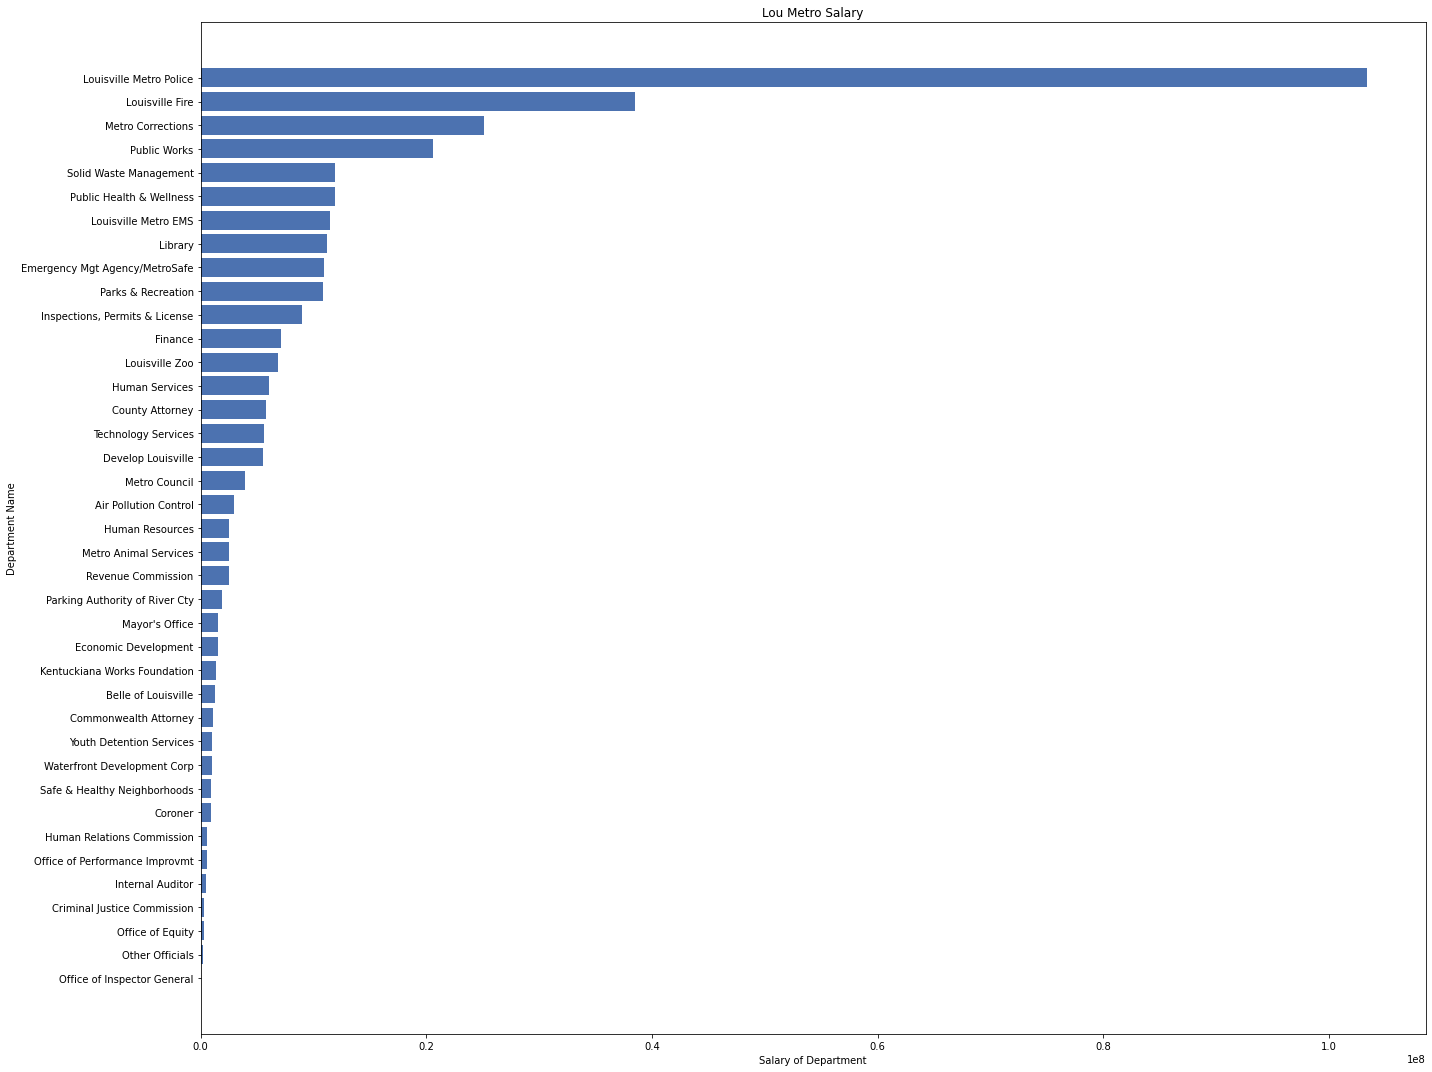

In [181]:
plt.style.use('seaborn-deep')
plt.figure(figsize= (20,15))
plt.barh('Department', 'YTD_Total', data = df)
plt.ylabel('Department Name')
plt.xlabel('Salary of Department')
plt.title('Lou Metro Salary')
plt.tight_layout()
plt.show()

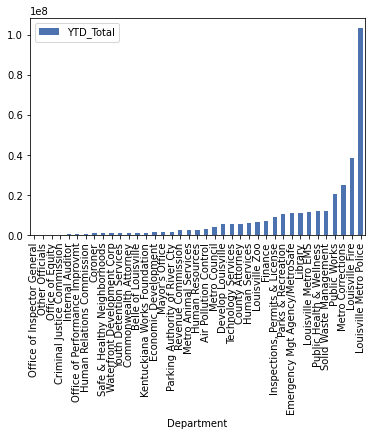

In [182]:
df.plot.bar(x='Department', y='YTD_Total', rot='vertical')
